In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import csv
import re
import nltk
from shapely.geometry import Point, Polygon

%matplotlib inline

In [3]:
li = []
for i in range(45):
    li.append('corona_tweets_'+str(9+i*7)+'.csv')
print(li)

['corona_tweets_9.csv', 'corona_tweets_16.csv', 'corona_tweets_23.csv', 'corona_tweets_30.csv', 'corona_tweets_37.csv', 'corona_tweets_44.csv', 'corona_tweets_51.csv', 'corona_tweets_58.csv', 'corona_tweets_65.csv', 'corona_tweets_72.csv', 'corona_tweets_79.csv', 'corona_tweets_86.csv', 'corona_tweets_93.csv', 'corona_tweets_100.csv', 'corona_tweets_107.csv', 'corona_tweets_114.csv', 'corona_tweets_121.csv', 'corona_tweets_128.csv', 'corona_tweets_135.csv', 'corona_tweets_142.csv', 'corona_tweets_149.csv', 'corona_tweets_156.csv', 'corona_tweets_163.csv', 'corona_tweets_170.csv', 'corona_tweets_177.csv', 'corona_tweets_184.csv', 'corona_tweets_191.csv', 'corona_tweets_198.csv', 'corona_tweets_205.csv', 'corona_tweets_212.csv', 'corona_tweets_219.csv', 'corona_tweets_226.csv', 'corona_tweets_233.csv', 'corona_tweets_240.csv', 'corona_tweets_247.csv', 'corona_tweets_254.csv', 'corona_tweets_261.csv', 'corona_tweets_268.csv', 'corona_tweets_275.csv', 'corona_tweets_282.csv', 'corona_tweet

In [4]:
df_list = ['corona_tweets_10.csv', 'corona_tweets_16.csv', 'corona_tweets_23.csv', 'corona_tweets_30.csv'] #list of dfs for raw csvs from the IEEE source
df_master = pd.DataFrame() #empty master dataframe
for raw in df_list:
    df_raw = pd.read_csv('data no geotag/'+raw, names=['id','sentiment_score'])
    df_master = pd.concat([df_master,df_raw], axis=0)

#df_ID = df_master['id']
df_master.to_csv(r'data no geotag/master up to 30.csv', index=False, header=None)
#df_ID.to_csv(r'ID only in January.csv', index=False, header=None)
#print(df_ID.shape)

In [6]:
# df_hydrate = pd.read_csv(r'data no geotag/hydrated up to 30.csv', low_memory=False, header = 0)

In [ ]:
# #left join to add a sentiment column to the hydrated df using unique tweeter ids
# df_merge = df_hydrate.merge(df_master, on='id', how='left')
# print (df_merge.shape)

# count = df_merge['text'].str.contains("vaccine").sum()
# print(count)

# vaccine_df = df_merge[df_merge['text'].str.contains("vaccine")]
# print(vaccine_df.head(3))
# #print(list(vaccine_df['text']))

In [11]:
vaccine_df = pd.read_csv(r'data no geotag/vaccine tweets up to 30.csv', lineterminator='\n', low_memory=False, names=['text','sentiment_score'])
vaccine_df.iloc[:, 0] = vaccine_df.iloc[:, 0].str.lstrip('\n') 

tweet_df = vaccine_df[['text','sentiment_score']]
tweet_df = tweet_df[~tweet_df.text.str.contains('RT')]
tweet_df = tweet_df.replace('\n',' ', regex=True)
tweet_df

,text,sentiment_score
0,all respected members a team of different co...,0.053333
1,ok here’s a question i believe we r gonna ov...,0.250000
2,well everywhere is talking about coronapeople...,0.000000
3,like combined global corona infection dashboar...,0.000000
4,they are already talking about how a corona v...,-1.000000
5,yeah those five words will give us the corona...,0.000000
6,victory over corona will not happen until we h...,0.000000
7,yep vaccines and drugs for corona 3 and on ...,0.100000
8,rangaji you are a scientist too amp as kno...,0.192460
9,there is no monetary value attached to human...,0.080000


In [12]:
class preprocess():
    def __init__(self, df, contractions, otherContractions):
        self.df = df
        self.contractions = contractions
        self.otherContractions = otherContractions
    
    def lower(self, tweet):
        return tweet.lower()
    
    def expand(self, tweet):
        for word in tweet.split():
            if word in self.contractions.keys():
                tweet = tweet.replace(word, self.contractions[word])
            elif word in self.otherContractions.keys():
                tweet = tweet.replace(word, self.otherContractions[word])
        return tweet

    def remove_hashtags(self, tweet):
        return re.sub(r'\#w+', '', tweet)
    
    def remove_mentions(self, tweet):
        for word in tweet.split():
            if word[0] == '@':
                tweet = tweet.replace(word, '')
        return tweet

    def remove_punctuations(self, tweet):
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')
        return tweet.translate(trantab)
    
    def remove_url(self,tweet):
        return re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', tweet)

    def deemojify(self, tweet):
        regrex_pattern = re.compile(pattern = "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
        return regrex_pattern.sub(r'',tweet)
    
    def preprocess_tweet(self, tweet):
        tweet = self.lower(tweet)
        tweet = self.expand(tweet)
        tweet = self.remove_mentions(tweet)
        tweet = self.remove_hashtags(tweet)
        tweet = self.remove_punctuations(tweet)
        tweet = self.deemojify(tweet)
        tweet = self.remove_url(tweet)
        return tweet

contractions = { 
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
"i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she shall / she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
"so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
"we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

contractionsWithAnotherInvertedComma = { 
"ain’t": "am not", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",
"couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
"hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "he’s": "he is",
"how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
"i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",
"it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us",
"ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
"mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have",
"shan’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will",
"she’ll’ve": "she will have", "she’s": "she is", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
"so’ve": "so have", "so’s": "so is", "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",
"there’d’ve": "there would have", "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will",
"they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would",
"we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have",
"who’s": "who is", "who’ve": "who have", "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",
"would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have",
"y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
"you’re": "you are", "you’ve": "you have"
}

pp_class = preprocess(tweet_df, contractions, contractionsWithAnotherInvertedComma)
tweet_df['text'] = tweet_df['text'].apply(lambda x : pp_class.preprocess_tweet(x))


In [2]:
tweet_df.to_csv(r'geo tweet.csv', index=False, header=None)

NameError: name 'tweet_df' is not defined

(array([9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 1.200e+01, 2.000e+00, 4.000e+00, 0.000e+00,
        1.500e+01, 1.000e+00, 4.000e+00, 7.000e+00, 0.000e+00, 2.700e+01,
        5.000e+00, 6.000e+00, 3.000e+00, 3.900e+01, 4.000e+00, 1.500e+01,
        7.000e+00, 4.400e+01, 1.100e+01, 2.400e+01, 1.600e+01, 5.400e+01,
        2.000e+01, 4.900e+01, 2.500e+01, 8.600e+01, 3.400e+01, 7.000e+01,
        5.500e+01, 5.900e+01, 1.090e+02, 9.400e+01, 9.700e+01, 8.900e+01,
        1.566e+03, 8.600e+01, 9.600e+01, 9.900e+01, 1.560e+02, 1.120e+02,
        1.440e+02, 1.250e+02, 7.700e+01, 1.760e+02, 1.060e+02, 1.400e+02,
        4.900e+01, 8.700e+01, 3.700e+01, 6.200e+01, 1.900e+01, 8.300e+01,
        1.300e+02, 9.000e+00, 1.400e+01, 1.410e+02, 1.100e+01, 1.300e+01,
        5.000e+00, 2.200e+01, 3.000e+00, 3.400e+01, 8.000e+00, 2.000e+00,
        2.800e+01, 0.000e+00, 1.000e+01, 1.000e+00, 1.700e+01, 0.000e+00,
        2.000e+00, 1.000e+00, 3.000e+0

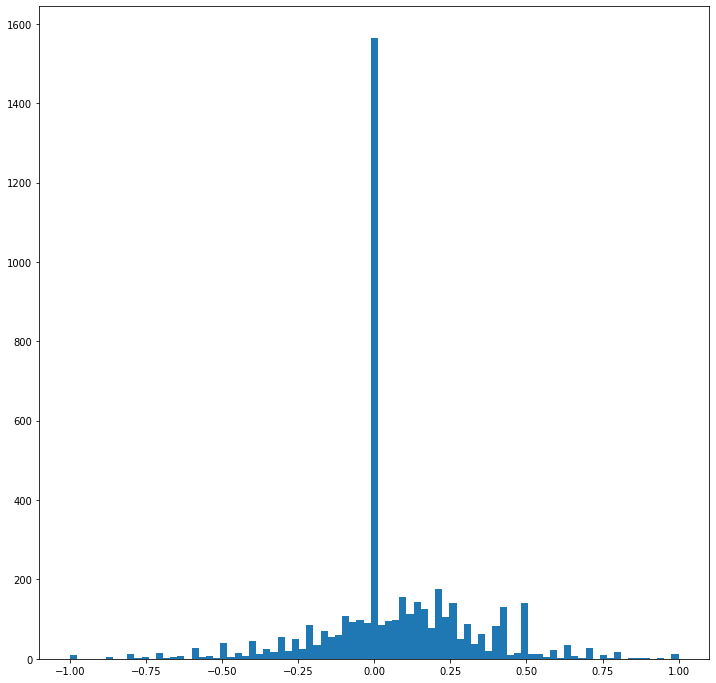

In [13]:
plt.figure(figsize=(12,12))
plt.hist(tweet_df['sentiment_score'], bins='auto') 

In [14]:
from wordcloud import WordCloud, STOPWORDS

There are 451360 words in the combination of all positive tweets.


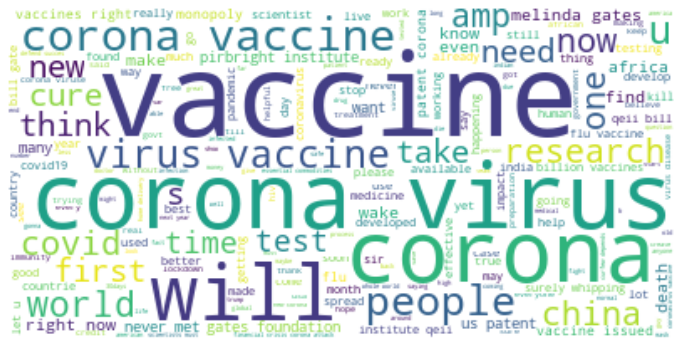

There are 230215 words in the combination of all negative tweets.


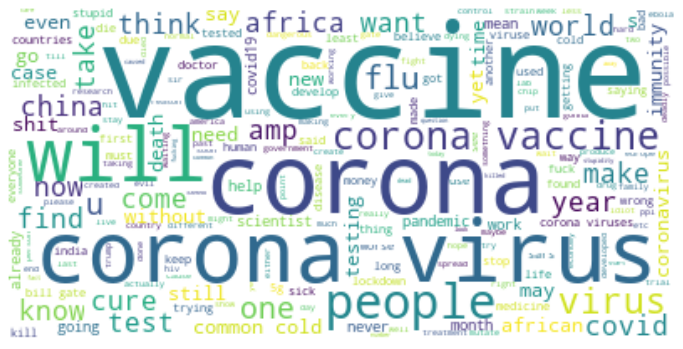

In [16]:
positive_df = tweet_df[(tweet_df['sentiment_score'] > 0)]
negative_df = tweet_df[(tweet_df['sentiment_score'] < 0)]

#wordcloud for tweets with a positive sentiment score 
pos_text = " ".join(tweet for tweet in positive_df.text)
print ("There are {} words in the combination of all positive tweets.".format(len(pos_text)))
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#wordcloud for tweets with a negative sentiment score 
neg_text = " ".join(tweet for tweet in negative_df.text)
print ("There are {} words in the combination of all negative tweets.".format(len(neg_text)))
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 875298 words in the combination of all review.


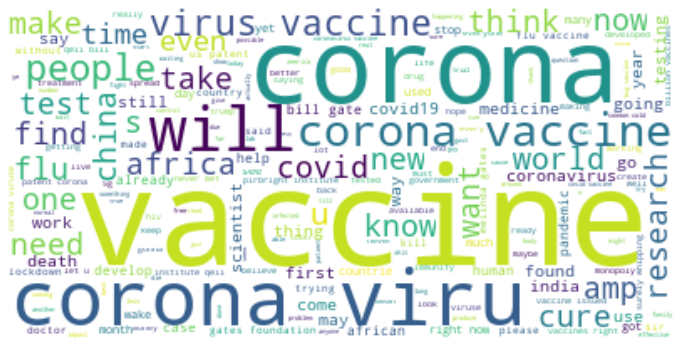

In [17]:
text = " ".join(tweet for tweet in tweet_df.text)
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#bigstring = tweet_df['text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')
# plt.figure(figsize=(12,12))
# wordcloud = WordCloud(stopwords=STOPWORDS,
#                           background_color='white',
#                           collocations=False,
#                           width=1200,
#                           height=1000
#                          ).generate(bigstring)
# plt.axis('off')
# plt.imshow(wordcloud)

In [20]:
import unicodedata

In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/cathy/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [23]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

words = clean(''.join(str(tweet_df['text'].tolist())))
words[:20]

['respected',
 'member',
 'team',
 'different',
 'country',
 'said',
 'field',
 'expert',
 'amp',
 'excellence',
 'medicine',
 'amp',
 'microbiology',
 'etc',
 'must',
 'formed',
 'rid',
 'corona',
 'virus',
 'covid']

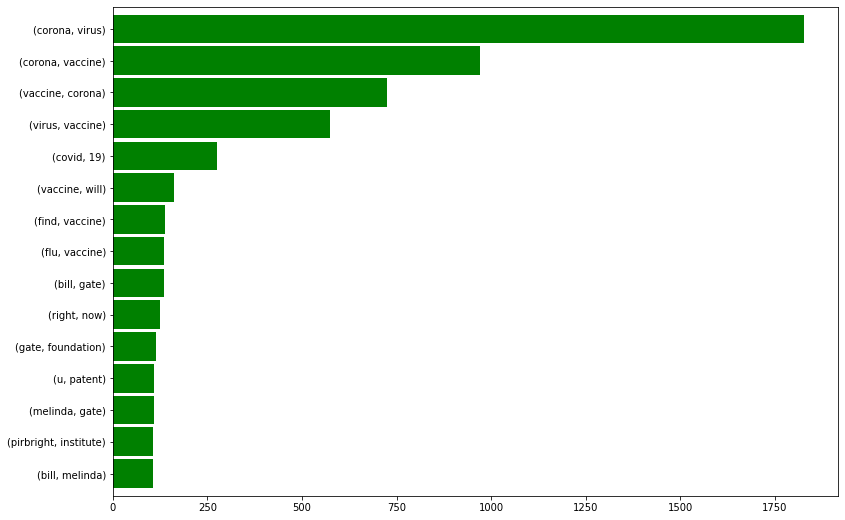

In [24]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'green', width = 0.9, figsize = (13, 9))


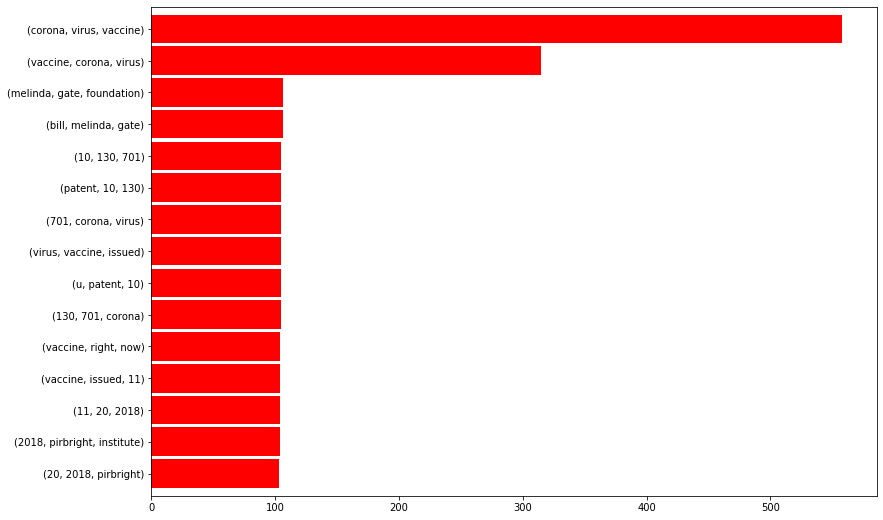

In [25]:
trigrams_series.sort_values().plot.barh(color = 'red', width = 0.9, figsize = (13, 9))
